In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
import tensorflow as tf

## Dataset

(1000000,)

(1000000,)

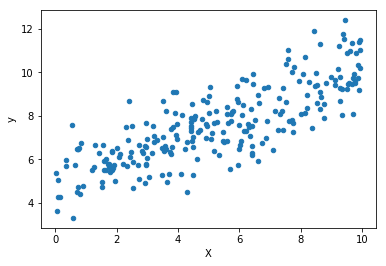

In [2]:
X = np.linspace(0.0,10.0,1000000)
y = (0.5 * X) + 5 + np.random.randn(len(X))

data = pd.concat([
    pd.DataFrame(data=X, columns=['X']),
    pd.DataFrame(data=y, columns=['y'])],axis=1)

display(data \
    .sample(n=250) \
    .plot(kind='scatter',x='X',y='y'))

display(X.shape)
display(y.shape)

## Estimator API
- Steps:
    + Create Data Input Function
    + Define a list of features
    + Create the Estimator model
    + Train,Eval,Predict on the Estimator obj

#### Train/Test Split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X ,y,
    test_size=0.3, random_state = 101)

#### Define Train/Test Input Function

In [4]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x':X_train}, y_train,
    batch_size=4,num_epochs=1000,shuffle=False)

test_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x':X_test}, y_test,
    batch_size=4,num_epochs=1000,shuffle=False)

#### Define a list of features

In [5]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

#### Create the Estimator model: Linear Regression

In [6]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpv85u1z5v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7feda5bd1c50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Train Estimator

In [7]:
estimator.train(
    input_fn=train_input_func,
    steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpv85u1z5v/model.ckpt.
INFO:tensorflow:loss = 254.73871, step = 1
INFO:tensorflow:global_step/sec: 83.9977
INFO:tensorflow:loss = 10.010511, step = 101 (1.187 sec)
INFO:tensorflow:global_step/sec: 327.347
INFO:tensorflow:loss = 21.269356, step = 201 (0.306 sec)
INFO:tensorflow:global_step/sec: 332.409
INFO:tensorflow:loss = 3.2395418, step = 301 (0.298 sec)
INFO:tensorflow:global_step/sec: 299.035
INFO:tensorflow:loss = 5.7854147, step = 401 (0.336 sec)
INFO:tensorflow:global_step/sec: 239.904
INFO:tensorflow:loss = 11.26316, step = 501 (0.414 sec)
INFO:tensorflow:global_step/sec: 231.987
INFO:tensorflow:loss = 0.36969516, step = 601 (0.431 sec)
INFO:tensorflow:global_step/sec: 285.495
INFO:tensorflow:

#### Evaluate Train

In [8]:
train_metrics = estimator.evaluate(
    input_fn=train_input_func,
    steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-12-05:22:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpv85u1z5v/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-12-05:22:52
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.11223, global_step = 1000, loss = 4.44892
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpv85u1z5v/model.ckpt-1000


In [9]:
print("train metrics: {}".format(train_metrics))

train metrics: {'average_loss': 1.11223, 'loss': 4.44892, 'global_step': 1000}


#### Evaluate Test

In [10]:
test_metrics = estimator.evaluate(
    input_fn=test_input_func,
    steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-12-05:22:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpv85u1z5v/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-12-05:22:55
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1548433, global_step = 1000, loss = 4.6193733
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpv85u1z5v/model.ckpt-1000


In [11]:
print("Test metrics: {}".format(test_metrics))

Test metrics: {'average_loss': 1.1548433, 'loss': 4.6193733, 'global_step': 1000}


#### Predictions

In [12]:
x = np.linspace(0,10,10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    {'x': x},
    shuffle=False)

y_pred = []
for e in estimator.predict(input_fn=input_fn_predict):
    y_pred.append(e['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpv85u1z5v/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


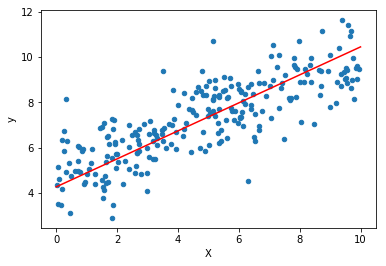

In [13]:
data.sample(n=250).plot(kind='scatter',x='X',y='y')
plt.plot(x , y_pred,'r')